 <img src="play-store-phones-hero.jpg">
 
 # Google Play Store:
 
 > Google Play Store have over 2.7 billion smartphone users across the world. There are close to 3 million apps available for download on the store for Google's Android OS users on their devices. The world economy of today relies heavily on mobile hardware and software innovation, on mobile apps that have permeated all its verticals. With several million mobile apps out there, the app industry is arguably the most influential and crucial for its growth. Most companies today need a mobile app to stay in front of prospects and customers and do business with them.
 
 
<img src="17-512.png">
 
# 1. Business Understanding:

***
- In the cutthroat competition between the app development companies, understanding the customer need and market demand is a crucial part before developing   any mobile app. 
- There is a need to careful monitor the competition and the current market needs and provide a solution that bridges the gap.
- Which monetary model works best on the App Marketplace.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [310]:
df = pd.read_csv('googleplaystore.csv')

In [311]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<img src="1-512.png">

# 2. Data Understanding
***

> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Data used here isscraped from the Google Play Store. Fields are:
- App : Application Name
- Category: Category the app belongs to
- Rating: Overall user rating of the app (as when scraped)
- Reviews: Number of user reviews for the app (as when scraped)
- Size: Size of the app (as when scraped)
- Installs: Number of user downloads/installs for the app (as when scraped)
- Type: Paid or Free
- Price: Price of the app (as when scraped)
- Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to
- Last Updated: Date when the app was last updated on Play Store (as when scraped)
- Current Ver: Current version of the app available on Play Store (as when scraped)
- Android Ver: Min required Android version (as when scraped)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<img src="2942557-200.png">

# 3. Data Cleaning
***

### 3.1. Removing NA Values

In [313]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [314]:
df = df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [315]:
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### Inference: 75% of the data in Rating lies between 4 and 5. Hence it is safe to replace the missing values with mean.

In [316]:
df["Rating"] = df["Rating"].fillna(value=df["Rating"].mean())

In [317]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### 3.2. Typecast Price, Reviews, Installs, Size and Rating from String to Int

In [319]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [320]:
col = 'Price'
df[col].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Price field have dollar sign due to which it is being read as string. So dollar sign needs to be removed before converting to int.

In [321]:
def StrToInt(dataframe, col):
    dataframe[col]= pd.to_numeric(dataframe[col])
    return dataframe


In [322]:
df.Price.unique()
df.Price = df.Price.apply(lambda x: str(x).replace("$",""))
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [323]:
df = StrToInt(df, 'Price' )

In [324]:
df = StrToInt(df, 'Reviews')
df = StrToInt(df, 'Rating')

In [325]:
#clean 'M','k', fill 'Varies with device' with median and transform to float 
lists = []
for i in df["Size"]:
    if 'M' in i:
        i = float(i.replace('M',''))
        i = i*1
        lists.append(i)
    elif 'k' in i:
        i = float(i.replace('k',''))
        i = i/100
        lists.append(i)
    else:
        lists.append("Unknown")
    
k = pd.Series(lists)
median = k[k!="Unknown"].median()
k = [median if i=="Unknown" else i for i in k]
df["Size"] = k

del k,median,lists

In [326]:
df.Size.describe()

count    10829.000000
mean        20.316949
std         20.888395
min          0.085000
25%          6.200000
50%         13.000000
75%         26.000000
max        100.000000
Name: Size, dtype: float64

In [327]:
df.Installs = df.Installs.apply(lambda x: str(x).replace("+",""))
df.Installs = df.Installs.apply(lambda x: str(x).replace(",",""))
df = StrToInt(df, 'Installs')

In [328]:
df.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [330]:
df = df.drop_duplicates(subset=['App'], keep = 'first')

<img src="download.png">

# 4. Data Visualization
***

### 4.1 Distribution Of Rating

Text(0.5, 1.0, 'Distribution of Rating')

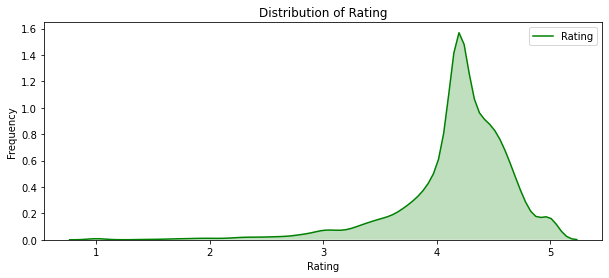

In [331]:
plt.figure(figsize =(10,4))
g = sns.kdeplot(df.Rating, color="green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating')

In [332]:
df.Rating.skew()

-1.9096498500439352

> **Interpretation**: Rating doesn't follow a normal distribution

### 4.2 Distribution of Size

Text(0, 0.5, 'Frequency')

<Figure size 864x432 with 0 Axes>

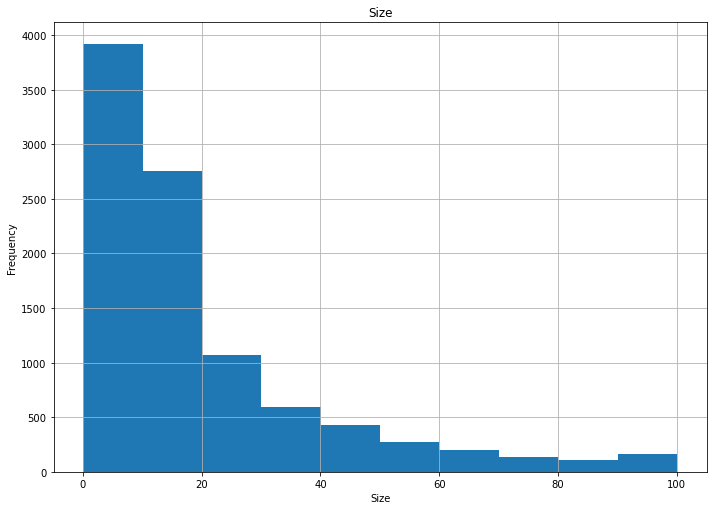

In [333]:
plt.figure(figsize =(12,6))
df.hist(column='Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

In [334]:
df.Size.skew()

1.8741855895144333

> **Interpretation**: Size doesn't follow a normal distribution

### 4.3 Installation Distribution

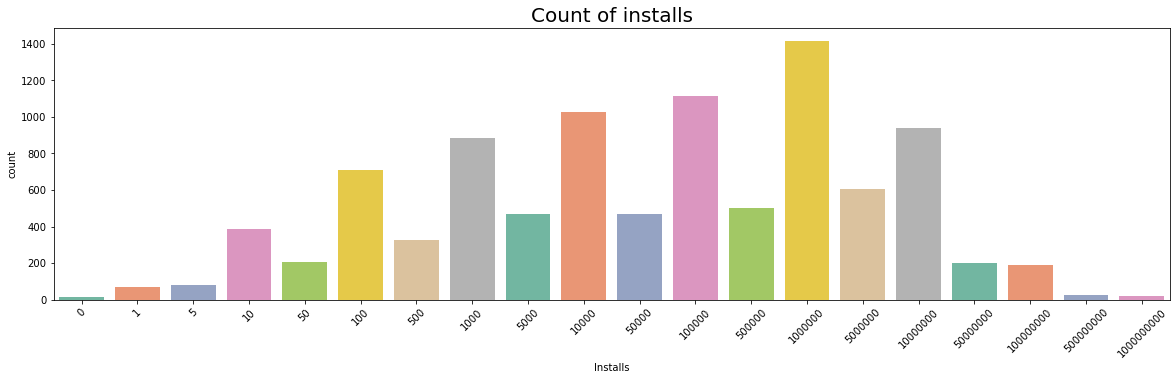

In [335]:
plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Installs'], palette="Set2")
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)
plt.title('Count of installs',size = 20)
plt.show(fig)


> **Interpretation**: Installs doesn't follow normal distribution and most of the apps have over1 million installations.

### 4.4 Count of apps in each category

Text(0.5, 1.0, 'Number of app in each category')

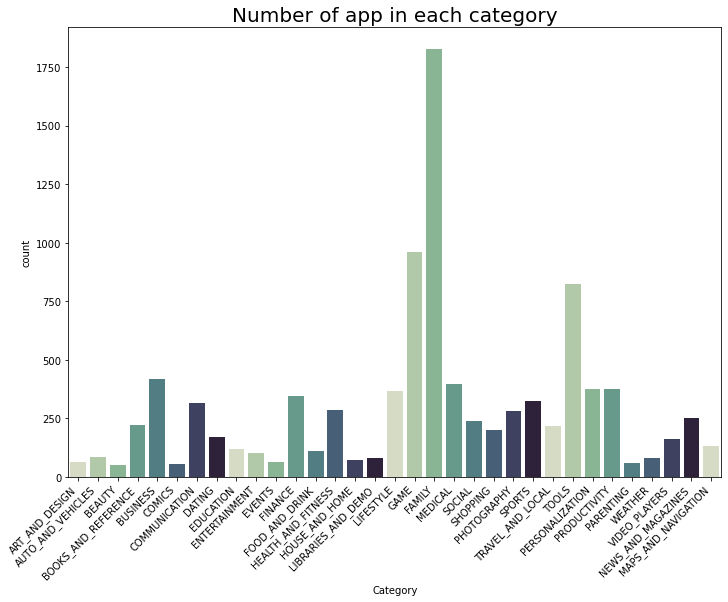

In [336]:
g = sns.countplot(x="Category",data=df, palette =sns.cubehelix_palette(8, start=.5, rot=-.75))
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right")
g 
plt.title('Number of app in each category',size = 20)

> **Interpretation**: Family category has most of the applications followed by Game and Tools. Comics and beauty have lowest number of applications

### 4.5 Number of Installations in each category

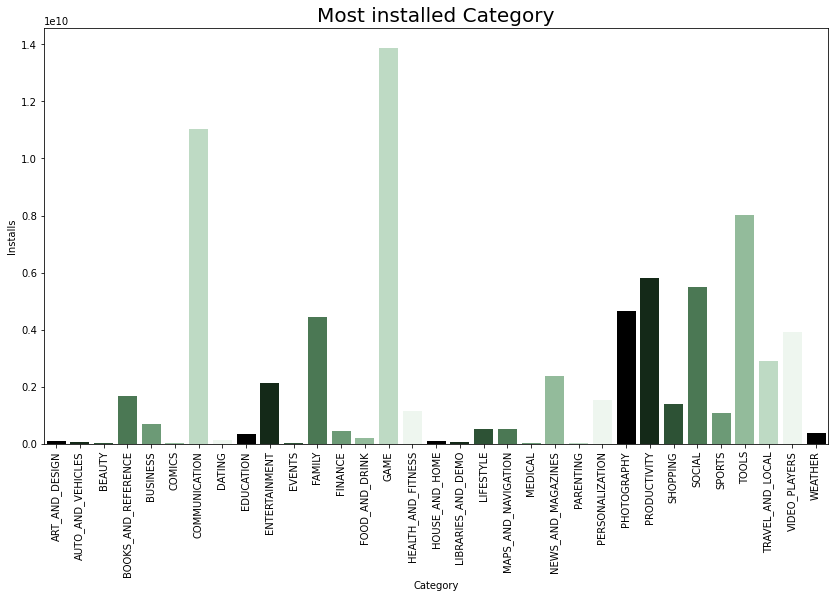

In [337]:
Cat_Install = df.groupby('Category')['Installs'].sum().reset_index()

plt.figure()
fig = sns.barplot(x=Cat_Install['Category'], y=Cat_Install['Installs'], palette=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.title('Most installed Category',size = 20)
plt.show(fig)

> **Interpretation**: Games category have highest number of installations followed by Communication. Family category that had highest number of applications have very less installations. Photography and Productivity both have less amount of applications in the app store but have high amount of installations.

### 4.6 Top 10 most reviewed App

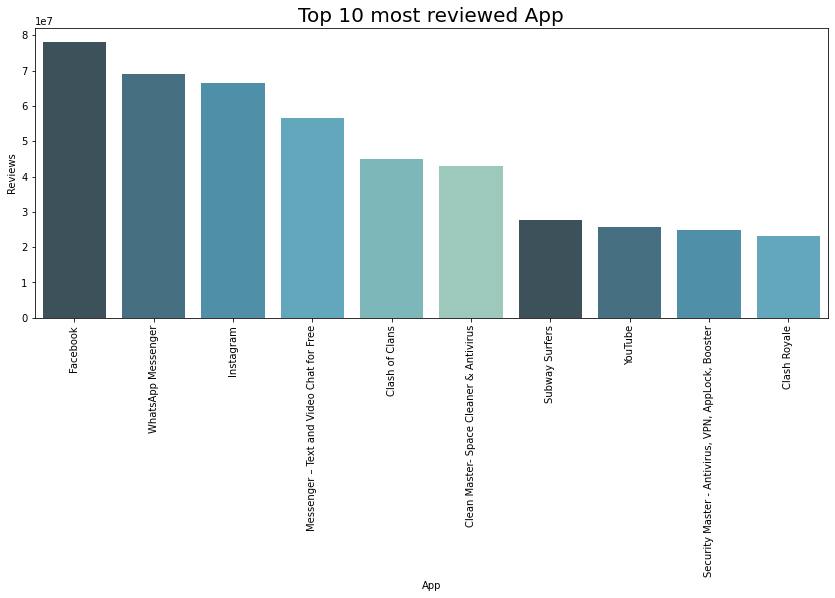

In [338]:
sorted_by_reviews = df.sort_values(by=['Reviews'], ascending=False)
sorted_by_reviews.head(10)


plt.figure()
fig = sns.barplot(x=sorted_by_reviews['App'][:10], y=sorted_by_reviews['Reviews'][:10], palette=sns.color_palette("GnBu_d"))
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.title('Top 10 most reviewed App',size = 20)
plt.show(fig)


### 4.7 Category wise Ratings

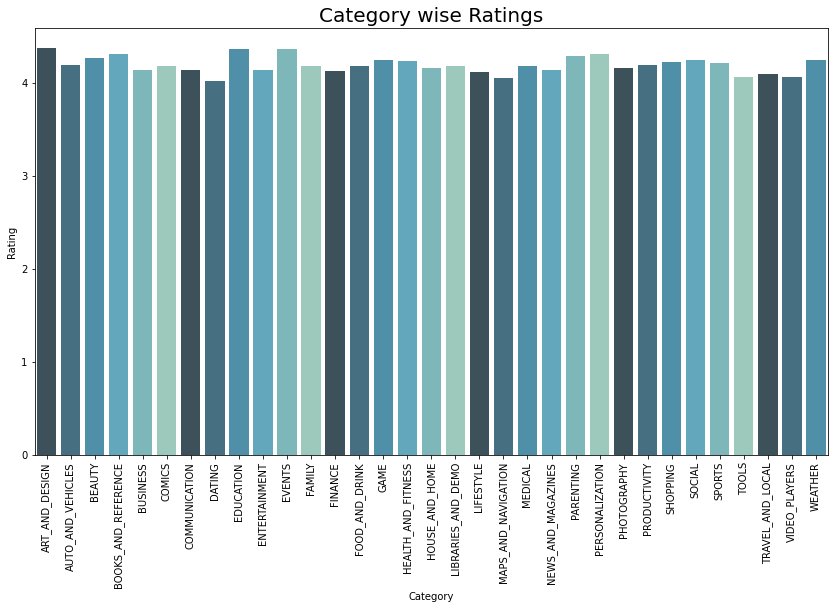

In [339]:
Cat_Rating=df.groupby('Category')['Rating'].mean().reset_index()

plt.figure()
fig = sns.barplot(x=Cat_Rating['Category'], y=Cat_Rating['Rating'], palette=sns.color_palette("GnBu_d"))
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.title('Category wise Ratings',size = 20)
plt.show(fig)

> **Interpretation**: Most of the categories have average rating 4+. There is not much difference in average rating for each category.

### 4.8 Average ratings by App Type

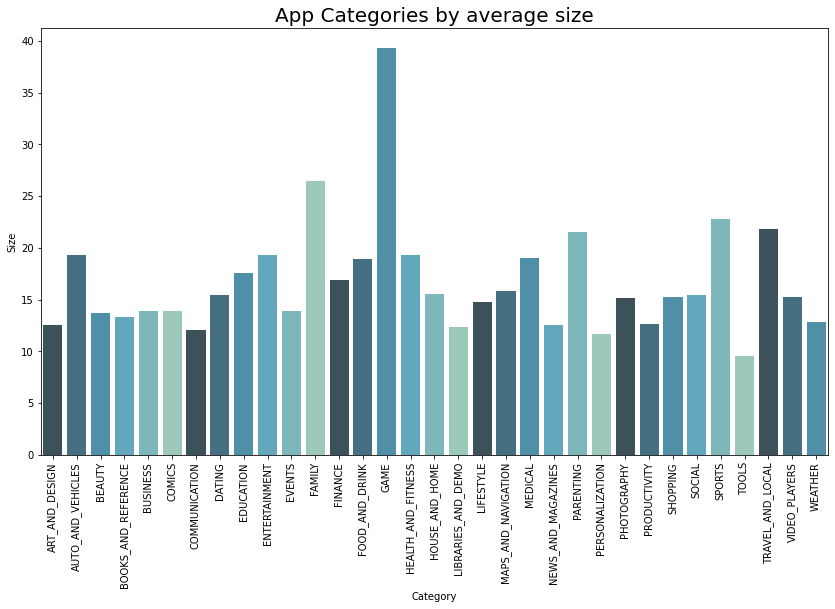

In [340]:
Cat_Size=df.groupby('Category')['Size'].mean().reset_index()

plt.figure()
fig = sns.barplot(x=Cat_Size['Category'], y=Cat_Size['Size'], palette=sns.color_palette("GnBu_d"))
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.title('App Categories by average size',size = 20)
plt.show(fig)

> **Interpretation**: Games categories occupy most of the sizes followed by apps under Family category. Communicating and Tools category apps which were installed most after Games have less size on average.

### 4.9 Rating vs Reviews

C:\Users\parit\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Text(0.5, 1.0, 'Rating VS Reviews')

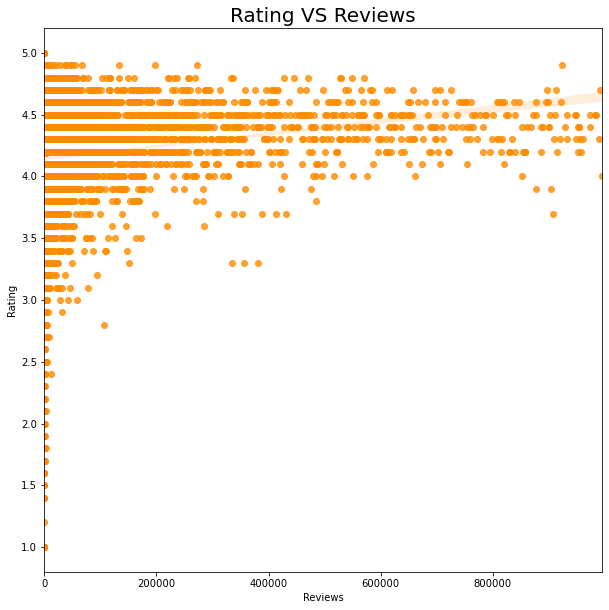

In [341]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Price',size = 20)
plt.title('Rating VS Reviews',size = 20)

> **Interpretation**: Apps with reviews less than 400,000 have a little higher ratings than than the apps who were reviewed more than 400,000.

### 4.9 Correlation of Numeric Features

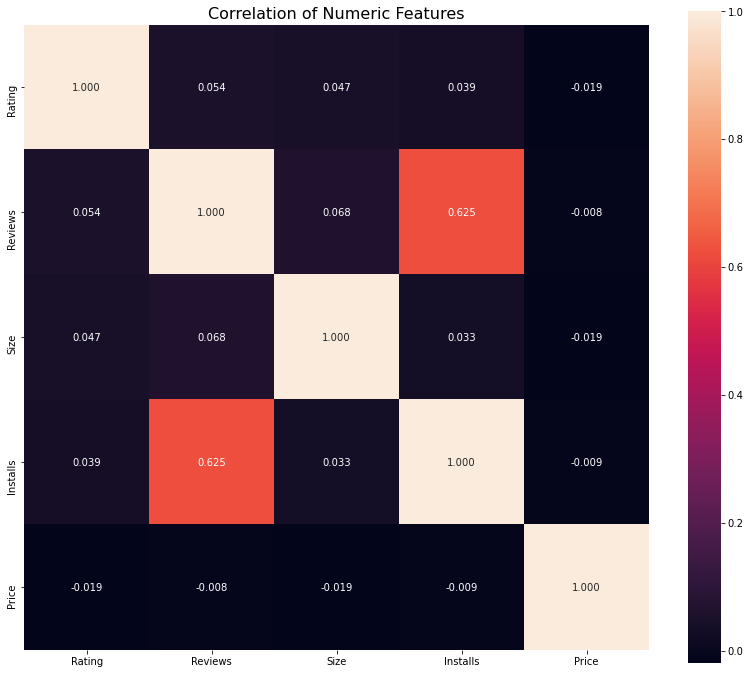

In [342]:
correlation = df.corr()

mask = np.triu(np.ones_like(correlation, dtype=np.bool))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

f , ax = plt.subplots(figsize = (14,12))
title=plt.title('Correlation of Numeric Features',y=1,size=16)
heatmap=sns.heatmap(correlation,square = True,  vmax=1,annot=True, fmt='.3f')
#heatmap=sns.heatmap(correlation ,mask=mask, annot=True, fmt=".2f", cmap='Blues',vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.show(heatmap)

> **Interpretation**: There exists high positive correlation between Reviews and Installations. If installations increases then reviews for the application will increase too.

### 4.10 Number of apps by Content Ratings

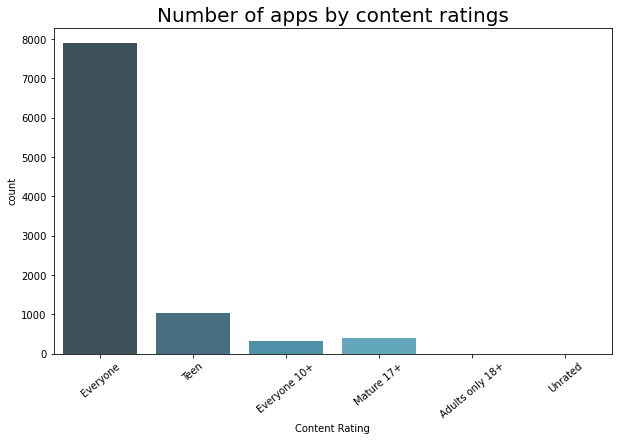

In [343]:
plt.figure(figsize=(10,6))
fig = sns.countplot(x=df['Content Rating'], palette=sns.color_palette("GnBu_d"))
fig.set_xticklabels(fig.get_xticklabels(),rotation=40)
plt.title('Number of apps by content ratings',size = 20)
plt.show(fig)


> **Interpretation**: Content rating with Everyone has most of the apps followed by Teen and Mature 17+.

### 4.11 Average installations by Content Rating

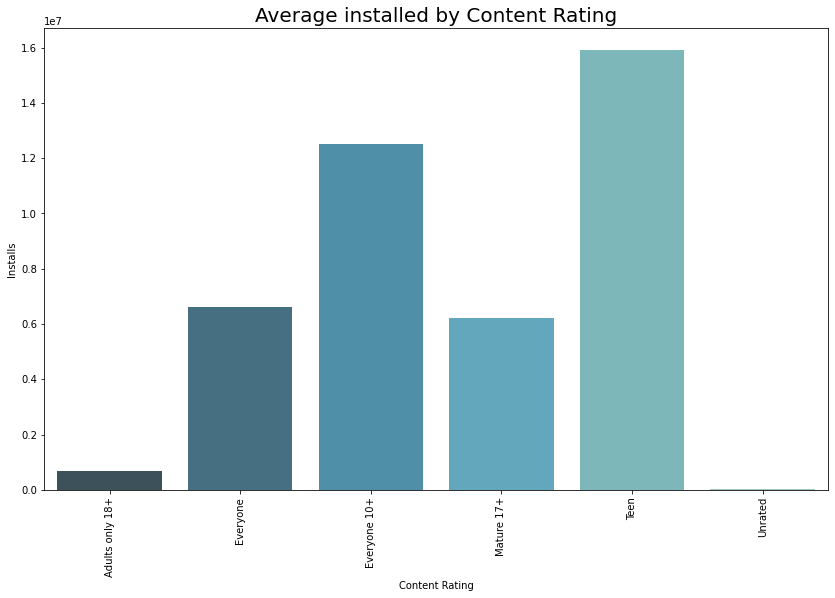

In [344]:
Cont_Rating=df.groupby('Content Rating')['Installs'].mean().reset_index()


plt.figure()
fig = sns.barplot(x=Cont_Rating['Content Rating'], y=Cont_Rating['Installs'], palette=sns.color_palette("GnBu_d"))
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.title('Average installed by Content Rating',size = 20)
plt.show(fig)

> **Interpretation**:  Content Rating of Teen had very less apps under itself but have the highest installations among rest of the Content Rating followed by Everyone 10+, Mature 10+ and Everyone.

### 4.12 Rating vs Price

C:\Users\parit\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


Text(0.5, 1.0, 'Rating vs Price')

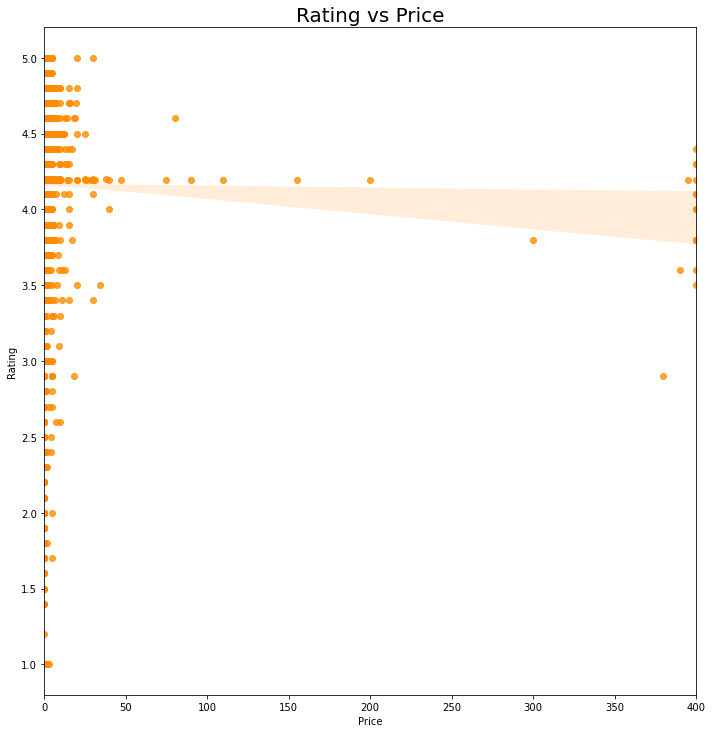

In [345]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.tight_layout()
plt.title('Rating vs Price',size = 20)

> **Interpretation**: Apps with Price 0 or less than 50 dollar have the highest rating. 

### 4.13 Average Installation by App Type

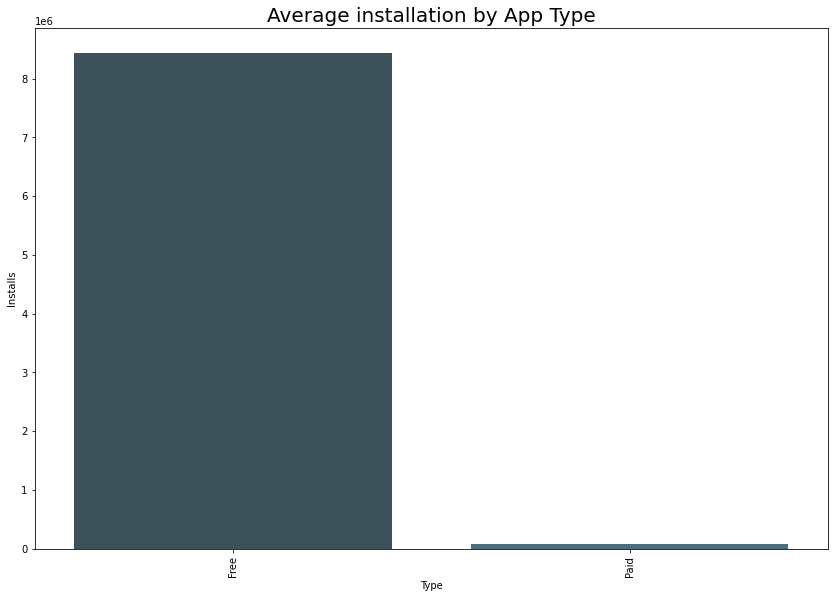

In [346]:
#df['PriceFlag'] =np.where( df['Price'] ==0,'Free','Paid')

#df['color'] = np.where(df['Set']=='Z', 'green', 'red')
Type_Install=df.groupby('Type')['Installs'].mean().reset_index()

plt.figure()
fig = sns.barplot(x=Type_Install['Type'], y=Type_Install['Installs'], palette=sns.color_palette("GnBu_d"))
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.title('Average installation by App Type',size = 20)
plt.show(fig)

> **Interpretation**: Free apps dominates the play store in terms of installations.

### 4.14 Average Ratings by App Type

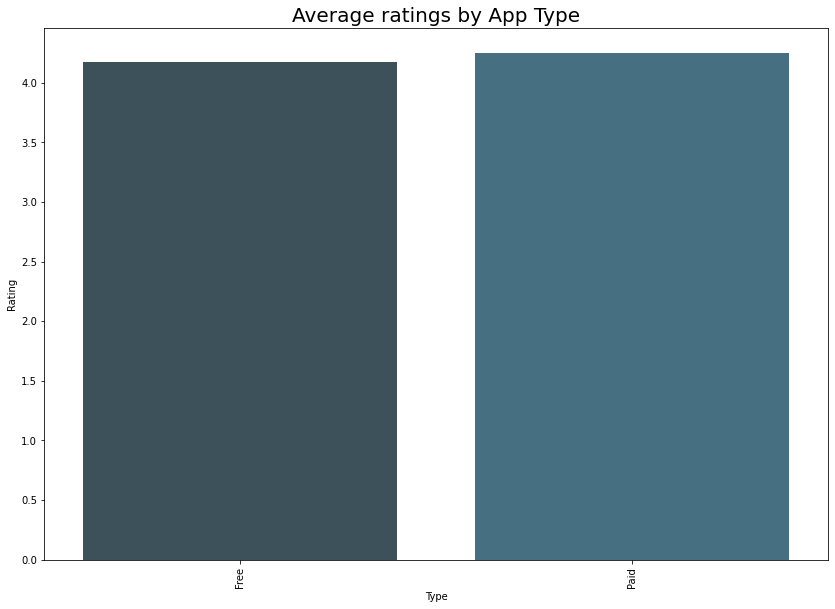

In [347]:
Type_Ratings=df.groupby('Type')['Rating'].mean().reset_index()

plt.figure()
fig = sns.barplot(x=Type_Ratings['Type'], y=Type_Ratings['Rating'], palette=sns.color_palette("GnBu_d"))
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.title('Average ratings by App Type',size = 20)
plt.show(fig)

>  **Inference**: Paid apps have liitle higher average ratings than the free ones.

### 4.15 Size vs Ratings

C:\Users\parit\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 842.4x595.44 with 0 Axes>

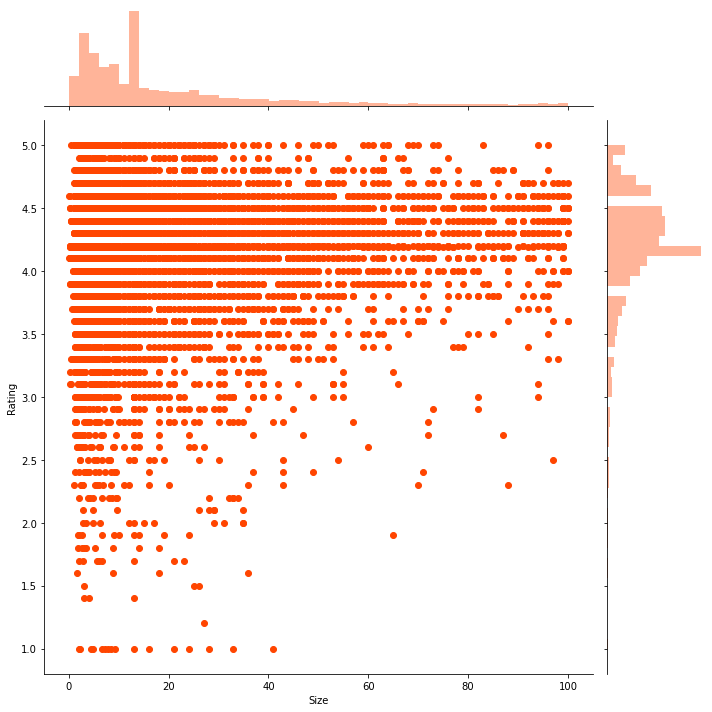

In [348]:
plt.figure()
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=df, size = 10);
plt.tight_layout()
#plt.title('Size vs Ratings')

<img src="images.png">

# 5. Insights
***

#### - Developing an paid app will not be benefial as average users installations are very less compared to paid ones. Instead in app purchases can be made by making the app free for installations.

#### - Apps for categories like Family, Lifestyle, Medical and Personalization should be ignored. These categories have high registered apps but have low installations.

#### - Apps can be built for categories like Photography, Productivity, Social and Communication. These categories have less registered apps and have high installations.

#### - Apps developed should be focused on Content rating of Teen as they have very less registered apps but have the highest installations. 